In [57]:
import pandas as pd
import numpy as np
fire_data=pd.read_excel('/Users/pattanaijiworawiwat/Downloads/Fire_Data.15240.1598195125.4438.xlsx')
fire_data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [30]:
fire_data['Time'] = fire_data['ACQ_TIME'] #สร้างcolumใหม่

In [31]:
fire_data['Time'] = fire_data['Time'].astype(str).str.zfill(4) #เพิ่ม0หลักข้างหน้าสุดถ้าไม่ครบ4ตำแหน่ง

In [32]:
fire_data['Time'] = fire_data['Time'].str.slice(stop=2)+':'+fire_data['Time'].str.slice(start=2) 
#เปลี่ยนเครื่องหมาย

In [33]:
fire_data['Time'] = pd.to_datetime(fire_data['ACQ_DATE'].astype(str)+' '+fire_data['Time'])


In [34]:
fire_data['Time'] = pd.to_datetime(fire_data['Time'] ,unit='s' ,origin='unix').astype(int)/10**10 #เปลี่ยนform

In [35]:
minunixtime = fire_data['Time'].min()

In [36]:
fire_data['Time'] = fire_data['Time']-minunixtime

In [37]:
dataset = fire_data[['LATITUDE','LONGITUDE','Time']]


,LATITUDE,LONGITUDE,Time
0,16.33696,98.70137,0.0
1,16.48906,98.73961,0.0
2,16.93571,99.06874,0.0
3,16.54092,98.59869,0.0
4,16.87473,98.63222,0.0
...,...,...,...
79229,17.81812,97.74127,1084848.0
79230,17.77545,97.85637,1084848.0
79231,17.76847,97.79116,1084848.0
79232,17.77518,97.82606,1084848.0


In [ ]:
dataset_2=dataset.head(400) #เลือก 5 วัน
dataset_2

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=120

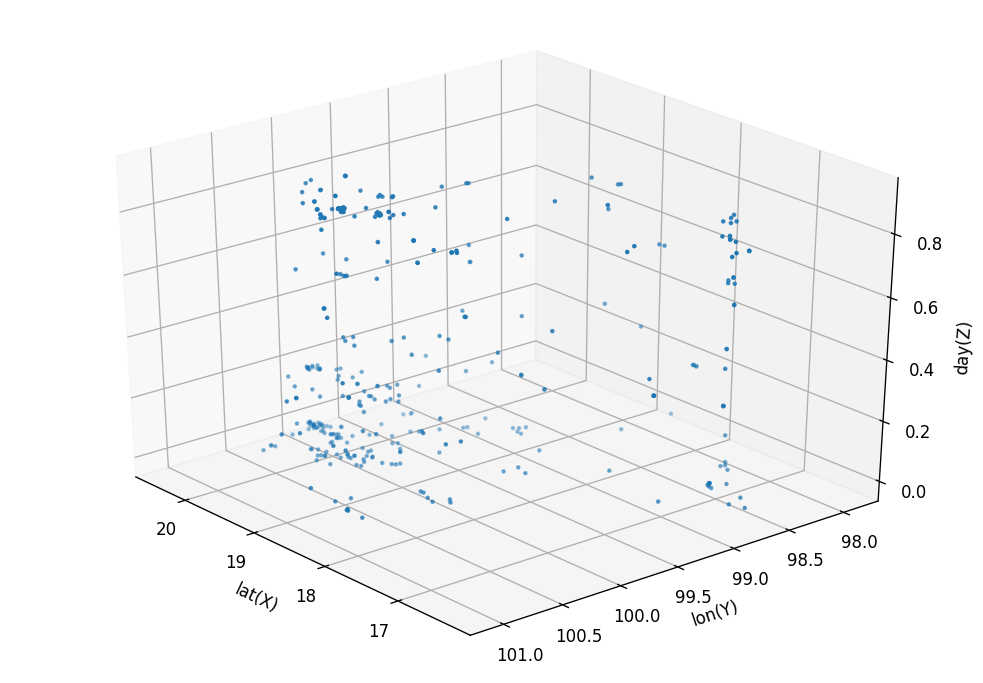

In [59]:
from mpl_toolkits.mplot3d import Axes3D #สร้างกราฟ3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dataset_2['LATITUDE'], dataset_2['LONGITUDE'], dataset_2['Time']/43200, s=3)
ax.view_init(azim=140)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('day(Z)')
plt.show()